## 22_Denoising microscope images

https://www.youtube.com/watch?v=2PrzKWkqOtU&t=4s

'Non local means' denoising filter is on scikit-image

But let's first of all, read an image

In [1]:
from skimage import io, img_as_float

I will read and then convert the image into float because later I will have to do some Math

In [2]:
img = img_as_float(io.imread("python_for_microscopists-master/images/denoising/noisy_img.jpg"))

I will import pyplot to save and display images

In [3]:
from matplotlib import pyplot as plt

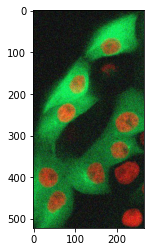

In [4]:
plt.imshow(img);

Now I will apply gaussian denoising from scipy

In [5]:
from scipy import ndimage as nd

In [6]:
gaussian_img = nd.gaussian_filter(img, sigma=3)

In [7]:
plt.imsave("python_for_microscopists-master/images/denoising/gaussianMINE.jpg", gaussian_img)

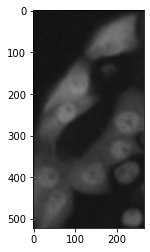

In [8]:
plt.imshow(gaussian_img);

As you've just seen, the gaussian filter removes noise but the image becomes blurred.

So I will try now a median filter (edge preserving filter)

In [9]:
median_img = nd.median_filter(img, size=3)
plt.imsave("python_for_microscopists-master/images/denoising/medianMINE.jpg", median_img)

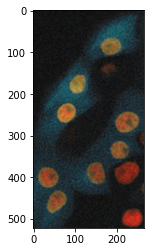

In [10]:
plt.imshow(median_img);

Now we want to apply the denoise filter from scikit-image.

You find all the documentation here: https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html

This is the command we are interested in:
### slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
                           
The denoise_nl_means filter is in skimage.restoration library

In [11]:
from skimage.restoration import denoise_nl_means, estimate_sigma

estimate_sigma belongs to numpy so we have to import numpy

In [12]:
import numpy as np

In [13]:
# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

Now I will apply the denoise_nl_means filter here:

In [14]:
# slow algorithm
nlm = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           patch_size=5, patch_distance=3, multichannel=True)

In [15]:
plt.imsave("python_for_microscopists-master/images/denoising/nlm.jpg", nlm)

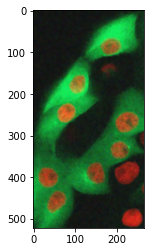

In [16]:
plt.imshow(nlm);

Now let's look at the original image and the denoised image side-by-side

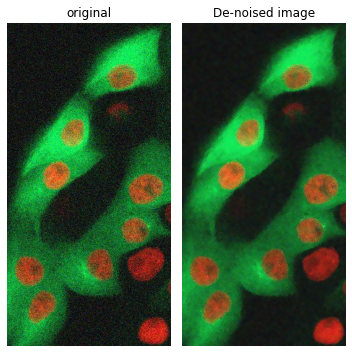

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(5, 5))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title('original')
ax[1].imshow(nlm)
ax[1].set_title('De-noised image')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();